In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import weekday_time_series, query_table
import seaborn as sns
import plotly.express as px
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = query_table(table='r707lv_trockner_10T')

In [3]:
#df = weekday_time_series(sensor_id='r707lv_trockner_15T')

In [4]:
px.line(
    x=df.index, y=df.kw, 
    title='Trockner R707LV',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [9]:
df.kw.mean(), df.kw.std()

(2.7975627370793235, 0.5451616689517983)

In [10]:
len(df)

241

In [13]:
time_int_range = np.arange(0, df.shape[0]*60, 60)
df['t'] = time_int_range
df['t_scaled'] = (df['t'] - df['t'].min()) / (df['t'].max() - df['t'].min())

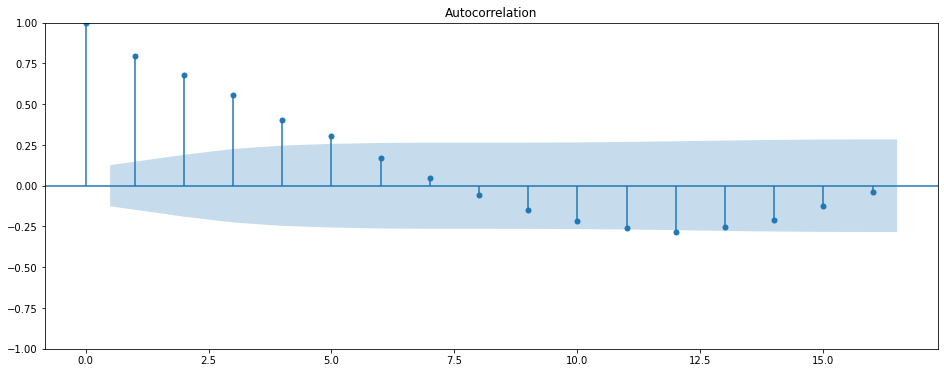

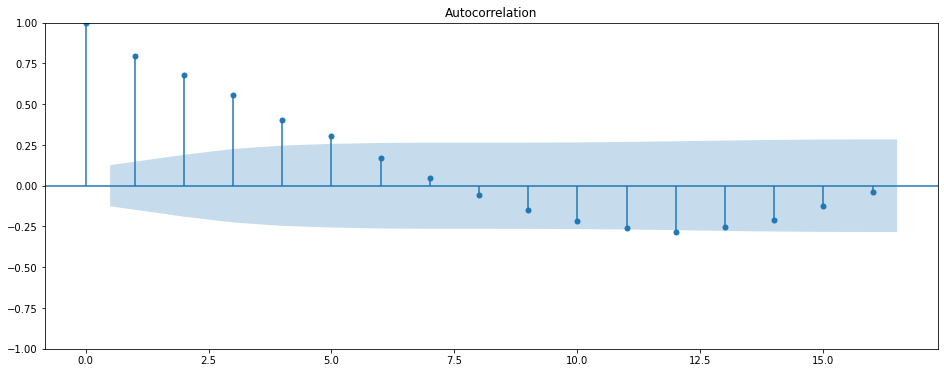

In [16]:
fig, ax = plt.subplots(figsize=(16, 6))
plot_acf(df.kw.values.squeeze(), lags=16, ax=ax)

In [17]:
df['t_scaled'].iloc[11], df['t_scaled'].iloc[13] ## short term

(0.04583333333333333, 0.05416666666666667)

In [15]:
df['t_scaled'].iloc[22], df['t_scaled'].iloc[28]

(0.09166666666666666, 0.11666666666666667)